In [ ]:
Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## This dataset represents data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition.

>The data contains 17 attributes and 2111 records

> The records are labeled with the class variable NObesity (Obesity Level),

> That allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

>The attributes related with eating habits are:

>>Frequent consumption of high caloric food (FAVC),

>>Frequency of consumption of vegetables (FCVC),

>>Number of main meals (NCP),

>>Consumption of food between meals (CAEC),

>>Consumption of water daily (CH20),

>>and Consumption of alcohol (CALC).

>The attributes related with the physical condition are:

>>Calories consumption monitoring (SCC),

>>Physical activity frequency (FAF),

>>Time using technology devices (TUE),

>>Transportation used (MTRANS),

>other variables obtained were: Gender, Age, Height and Weight. 

>Finally, all data was labeled and the class variable NObesity was created with the values of: Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III, based on Equation (1) and information from WHO and Mexican Normativity. The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format and ARFF format to be used with the Weka tool.

In [7]:
df.shape

(2111, 17)

In [8]:
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
# No Null Values

In [10]:
df.duplicated().sum()

24

In [ ]:
# There are 24 duplicate Values

In [ ]:
# Handling duplicate values

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [14]:
df.nunique()

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [15]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

We have 9 categorical features : ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [17]:
print("Categories in 'Gender' variable:",end="" )
print(df['Gender'].unique())

print("Categories in 'family_history_with_overweight' variable:",end="")
print(df['family_history_with_overweight'].unique())

print("Categories in'FAVC' variable:",end="" )
print(df['FAVC'].unique())

print("Categories in 'CAEC' variable:",end="" )
print(df['CAEC'].unique())

print("Categories in 'SMOKE' variable:",end="" )
print(df['SMOKE'].unique())

print("Categories in 'SCC' variable:",end="" )
print(df['SCC'].unique())

print("Categories in 'CALC' variable:",end="" )
print(df['CALC'].unique())

print("Categories in 'MTRANS' variable:",end="" )
print(df['MTRANS'].unique())

print("Categories in 'NObeyesdad' variable:",end="" )
print(df['NObeyesdad'].unique())

Categories in 'Gender' variable:['Female' 'Male']
Categories in 'family_history_with_overweight' variable:['yes' 'no']
Categories in'FAVC' variable:['no' 'yes']
Categories in 'CAEC' variable:['Sometimes' 'Frequently' 'Always' 'no']
Categories in 'SMOKE' variable:['no' 'yes']
Categories in 'SCC' variable:['no' 'yes']
Categories in 'CALC' variable:['no' 'Sometimes' 'Frequently' 'Always']
Categories in 'MTRANS' variable:['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Categories in 'NObeyesdad' variable:['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='Gender')
plt.show()

StopIteration: 

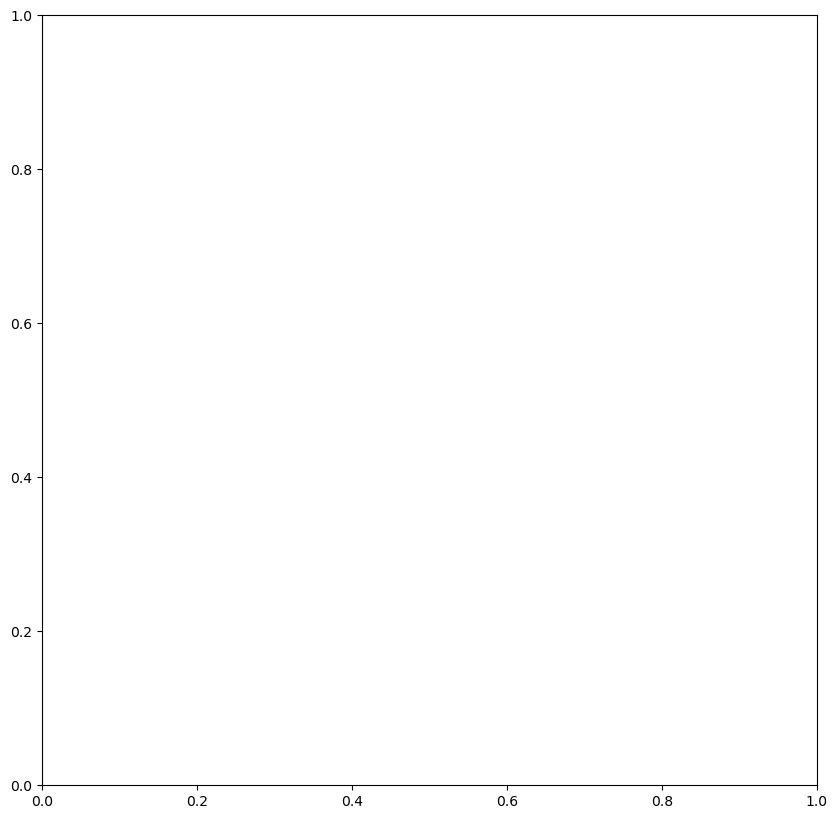

In [20]:
plt.figure(figsize=(10,10))
x=1
for i in numeric_features:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()